In [3]:
climate4R <- list("loadeR", "transformeR", "downscaleR", "visualizeR", "climate4R.climdex")
lapply(climate4R, require, character.only = TRUE) 

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

In [4]:
library(devtools)
library(tidyverse)

In [5]:
# métrica de validación: RMSE
rmse <- function(obs, pred) {  
  sqrt(mean((obs - pred)^2,na.rm = TRUE))
  
}
# métrica de años acertados
acc <- function(obs,pred){
    terciles = quantile(obs, probs = c(.33,.66,1), na.rm = TRUE)
    if (terciles[1]==terciles[2]){
        terciles[2] = terciles[1] + 1/10000
    }
    if (terciles[1]==terciles[3]){
        terciles[3] = terciles[1] + 1/10000
    }
    if (terciles[2]==terciles[3]){
        terciles[3] = terciles[2] + 1/10000
    }
    x = cut(obs, breaks = c(-Inf,terciles), labels = c("lower","mid",
                                                 "upper"))
    terciles_pred = quantile(pred, probs = c(.33,.66,1), na.rm = TRUE)
    if (terciles_pred[1]==terciles_pred[2]){
        terciles_pred[2] = terciles_pred[1] + 1/10000
    }
    if (terciles_pred[1]==terciles_pred[3]){
        terciles_pred[3] = terciles_pred[1] + 1/10000
    }
    if (terciles_pred[2]==terciles_pred[3]){
        terciles_pred[3] = terciles_pred[2] + 1/10000
    }
    y = cut(pred, breaks = c(-Inf,terciles_pred), labels = c("lower","mid",
                                                 "upper"))
    z = length(which(x==y))
    
    return (z/length(obs))
}

In [9]:
load("./pr_JJA.rda",verbose = T)
load("./tas_JJA.rda",verbose = T)
load("./MAM/pr_MAM.rda",verbose = T)
load("./MAM/tas_MAM.rda",verbose = T)
load("./son/pr_SON.rda",verbose = T)
load("./son/tas_SON.rda",verbose = T)
load("./DJF/pr_DJF.rda",verbose = T)
load("./DJF/tas_DJF.rda",verbose = T)

Loading objects:
  data_JJA
Loading objects:
  data_JJA_temp
Loading objects:
  data_MAM
Loading objects:
  data_MAM_temp
Loading objects:
  data_SON
Loading objects:
  data_SON_temp
Loading objects:
  data_DJF
Loading objects:
  data_DJF_temp


## JJA

In [7]:
load("./predict_pr_regression.rda",verbose = T)
load("./predict_pr_regression_LT1.rda",verbose = T)
load("./predict_pr_regression_LT4.rda",verbose = T)
load("./predict_tas_regression.rda",verbose = T)
load("./predict_tas_regression_LT1.rda",verbose = T)
load("./predict_tas_regression_LT4.rda",verbose = T)

Loading objects:
  predict_pr_regression
Loading objects:
  predict_pr_regression_LT1
Loading objects:
  predict_pr_regression_LT4
Loading objects:
  predict_tas_regression
Loading objects:
  predict_tas_regression_LT1
Loading objects:
  predict_tas_regression_LT4


In [8]:
rmse_pr_regression = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_regression = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_regression_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_regression_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_regression_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_regression_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
for(i in 1:length(data_JJA$xyCoords$x)){
    for(j in 1:length(data_JJA$xyCoords$y)){
        if(length(which(is.na(data_JJA$Data[,j,i])==FALSE))>2){
            rmse_pr_regression[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_regression$Data[,j,i])
            acc_pr_regression[j,i] = acc(data_JJA$Data[,j,i],predict_pr_regression$Data[,j,i])
            
            rmse_pr_regression_LT1[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_regression_LT1$Data[,j,i])
            acc_pr_regression_LT1[j,i] = acc(data_JJA$Data[,j,i],predict_pr_regression_LT1$Data[,j,i])
            
            rmse_pr_regression_LT4[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_regression_LT4$Data[,j,i])
            acc_pr_regression_LT4[j,i] = acc(data_JJA$Data[,j,i],predict_pr_regression_LT4$Data[,j,i])
            
       }
    }
}

rmse_tas_regression = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_regression= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_regression_LT1 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_regression_LT1= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_regression_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_regression_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
for(i in 1:length(data_JJA_temp$xyCoords$x)){
    for(j in 1:length(data_JJA_temp$xyCoords$y)){
        if(length(which(is.na(data_JJA_temp$Data[,j,i])==FALSE))>2){
            rmse_tas_regression[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_regression$Data[,j,i])
            acc_tas_regression[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_regression$Data[,j,i])
            
            rmse_tas_regression_LT1[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_regression_LT1$Data[,j,i])
            acc_tas_regression_LT1[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_regression_LT1$Data[,j,i])
            
            rmse_tas_regression_LT4[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_regression_LT4$Data[,j,i])
            acc_tas_regression_LT4[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_regression_LT4$Data[,j,i])
       }
    }
}

In [9]:
load("./predict_pr_tree.rda",verbose = T)
load("./predict_pr_tree_LT1.rda",verbose = T)
load("./predict_pr_tree_LT4.rda",verbose = T)
load("./predict_tas_tree.rda",verbose = T)
load("./predict_tas_tree_LT1.rda",verbose = T)
load("./predict_tas_tree_LT4.rda",verbose = T)

Loading objects:
  predict_pr_tree
Loading objects:
  predict_pr_tree_LT1
Loading objects:
  predict_pr_tree_LT4
Loading objects:
  predict_tas_tree
Loading objects:
  predict_tas_tree_LT1
Loading objects:
  predict_tas_tree_LT4


In [10]:
rmse_pr_tree = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_tree = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_tree_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_tree_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_tree_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_tree_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
for(i in 1:length(data_JJA$xyCoords$x)){
    for(j in 1:length(data_JJA$xyCoords$y)){
        if(length(which(is.na(data_JJA$Data[,j,i])==FALSE))>2){
            rmse_pr_tree[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_tree$Data[,j,i])
            acc_pr_tree[j,i] = acc(data_JJA$Data[,j,i],predict_pr_tree$Data[,j,i])
            
            rmse_pr_tree_LT1[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_tree_LT1$Data[,j,i])
            acc_pr_tree_LT1[j,i] = acc(data_JJA$Data[,j,i],predict_pr_tree_LT1$Data[,j,i])
            
            rmse_pr_tree_LT4[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_tree_LT4$Data[,j,i])
            acc_pr_tree_LT4[j,i] = acc(data_JJA$Data[,j,i],predict_pr_tree_LT4$Data[,j,i])
            
       }
    }
}

rmse_tas_tree = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_tree= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_tree_LT1 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_tree_LT1= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_tree_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_tree_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
for(i in 1:length(data_JJA_temp$xyCoords$x)){
    for(j in 1:length(data_JJA_temp$xyCoords$y)){
        if(length(which(is.na(data_JJA_temp$Data[,j,i])==FALSE))>2){
            rmse_tas_tree[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_tree$Data[,j,i])
            acc_tas_tree[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_tree$Data[,j,i])
            
            rmse_tas_tree_LT1[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_tree_LT1$Data[,j,i])
            acc_tas_tree_LT1[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_tree_LT1$Data[,j,i])
            
            rmse_tas_tree_LT4[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_tree_LT4$Data[,j,i])
            acc_tas_tree_LT4[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_tree_LT4$Data[,j,i])
       }
    }
}

In [11]:
load("./predict_pr_rf.rda",verbose = T)
load("./predict_pr_rf_LT1.rda",verbose = T)
load("./predict_pr_rf_LT4.rda",verbose = T)
load("./predict_tas_rf.rda",verbose = T)
load("./predict_tas_rf_LT1.rda",verbose = T)
load("./predict_tas_rf_LT4.rda",verbose = T)

Loading objects:
  predict_pr_rf
Loading objects:
  predict_pr_rf_LT1
Loading objects:
  predict_pr_rf_LT4
Loading objects:
  predict_tas_rf
Loading objects:
  predict_tas_rf_LT1
Loading objects:
  predict_tas_rf_LT4


In [12]:
rmse_pr_rf = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_rf = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_rf_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_rf_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_rf_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_rf_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
for(i in 1:length(data_JJA$xyCoords$x)){
    for(j in 1:length(data_JJA$xyCoords$y)){
        if(length(which(is.na(data_JJA$Data[,j,i])==FALSE))>2){
            rmse_pr_rf[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_rf$Data[,j,i])
            acc_pr_rf[j,i] = acc(data_JJA$Data[,j,i],predict_pr_rf$Data[,j,i])
            
            rmse_pr_rf_LT1[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_rf_LT1$Data[,j,i])
            acc_pr_rf_LT1[j,i] = acc(data_JJA$Data[,j,i],predict_pr_rf_LT1$Data[,j,i])
            
            rmse_pr_rf_LT4[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_rf_LT4$Data[,j,i])
            acc_pr_rf_LT4[j,i] = acc(data_JJA$Data[,j,i],predict_pr_rf_LT4$Data[,j,i])
            
       }
    }
}

rmse_tas_rf = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_rf= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_rf_LT1 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_rf_LT1= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_rf_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_rf_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
for(i in 1:length(data_JJA_temp$xyCoords$x)){
    for(j in 1:length(data_JJA_temp$xyCoords$y)){
        if(length(which(is.na(data_JJA_temp$Data[,j,i])==FALSE))>2){
            rmse_tas_rf[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_rf$Data[,j,i])
            acc_tas_rf[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_rf$Data[,j,i])
            
            rmse_tas_rf_LT1[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_rf_LT1$Data[,j,i])
            acc_tas_rf_LT1[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_rf_LT1$Data[,j,i])
            
            rmse_tas_rf_LT4[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_rf_LT4$Data[,j,i])
            acc_tas_rf_LT4[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_rf_LT4$Data[,j,i])
       }
    }
}

In [13]:
comparation_pr = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
comparation_pr_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
comparation_pr_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))

comparation_tas = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
comparation_tas_LT1 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
comparation_tas_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))

In [14]:
for(i in 1:length(data_JJA$xyCoords$x)){
    for(j in 1:length(data_JJA$xyCoords$y)){
        
        if(length(which(!is.na(c(rmse_pr_regression[j,i],rmse_pr_tree[j,i],rmse_pr_rf[j,i]))))>0){
            comp = which(c(rmse_pr_regression[j,i],rmse_pr_tree[j,i],rmse_pr_rf[j,i])== 
                     min(rmse_pr_regression[j,i],rmse_pr_tree[j,i],rmse_pr_rf[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_pr[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_pr_regression_LT1[j,i],rmse_pr_tree_LT1[j,i],rmse_pr_rf_LT1[j,i]))))>0){
            comp = which(c(rmse_pr_regression_LT1[j,i],rmse_pr_tree_LT1[j,i],rmse_pr_rf_LT1[j,i])== 
                     min(rmse_pr_regression_LT1[j,i],rmse_pr_tree_LT1[j,i],rmse_pr_rf_LT1[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_pr_LT1[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_pr_regression_LT4[j,i],rmse_pr_tree_LT4[j,i],rmse_pr_rf_LT4[j,i]))))>0){
            comp = which(c(rmse_pr_regression_LT4[j,i],rmse_pr_tree_LT4[j,i],rmse_pr_rf_LT4[j,i])== 
                     min(rmse_pr_regression_LT4[j,i],rmse_pr_tree_LT4[j,i],rmse_pr_rf_LT4[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_pr_LT4[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_tas_regression[j,i],rmse_tas_tree[j,i],rmse_tas_rf[j,i]))))>0){
            comp = which(c(rmse_tas_regression[j,i],rmse_tas_tree[j,i],rmse_tas_rf[j,i])== 
                     min(rmse_tas_regression[j,i],rmse_tas_tree[j,i],rmse_tas_rf[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_tas[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_tas_regression_LT1[j,i],rmse_tas_tree_LT1[j,i],rmse_tas_rf_LT1[j,i]))))>0){
            comp = which(c(rmse_tas_regression_LT1[j,i],rmse_tas_tree_LT1[j,i],rmse_tas_rf_LT1[j,i])== 
                     min(rmse_tas_regression_LT1[j,i],rmse_tas_tree_LT1[j,i],rmse_tas_rf_LT1[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_tas_LT1[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_tas_regression_LT4[j,i],rmse_tas_tree_LT4[j,i],rmse_tas_rf_LT4[j,i]))))>0){
            comp = which(c(rmse_tas_regression_LT4[j,i],rmse_tas_tree_LT4[j,i],rmse_tas_rf_LT4[j,i])== 
                     min(rmse_tas_regression_LT4[j,i],rmse_tas_tree_LT4[j,i],rmse_tas_rf_LT4[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_tas_LT4[j,i] = comp
            }
            
        }
        
    }
}

In [15]:
library(RColorBrewer)
colstx <- rev(brewer.pal(n = 9, "Spectral"))
colsindex <- rev(brewer.pal(n = 9, "RdYlBu"))
colsdelta <- brewer.pal(n = 9, "Reds")
colsbias <- brewer.pal(n = 9, "PiYG")
colssd <- brewer.pal(n = 9, "Blues")

In [16]:
makeC4R = function(data, template) {  # creates a C4R object from the "data" matrix
  C4R = template; C4R$Data = data; attributes(C4R$Data) = attributes(template$Data)
  return(C4R)
}
template = subsetDimension(data_JJA, dimension = "time", indices = 1)
comparation_pr= makeC4R(comparation_pr,template)
comparation_pr_LT1 = makeC4R(comparation_pr_LT1,template)
comparation_pr_LT4= makeC4R(comparation_pr_LT4,template)

comparation_tas= makeC4R(comparation_tas,template)
comparation_tas_LT1 = makeC4R(comparation_tas_LT1,template)
comparation_tas_LT4= makeC4R(comparation_tas_LT4,template)

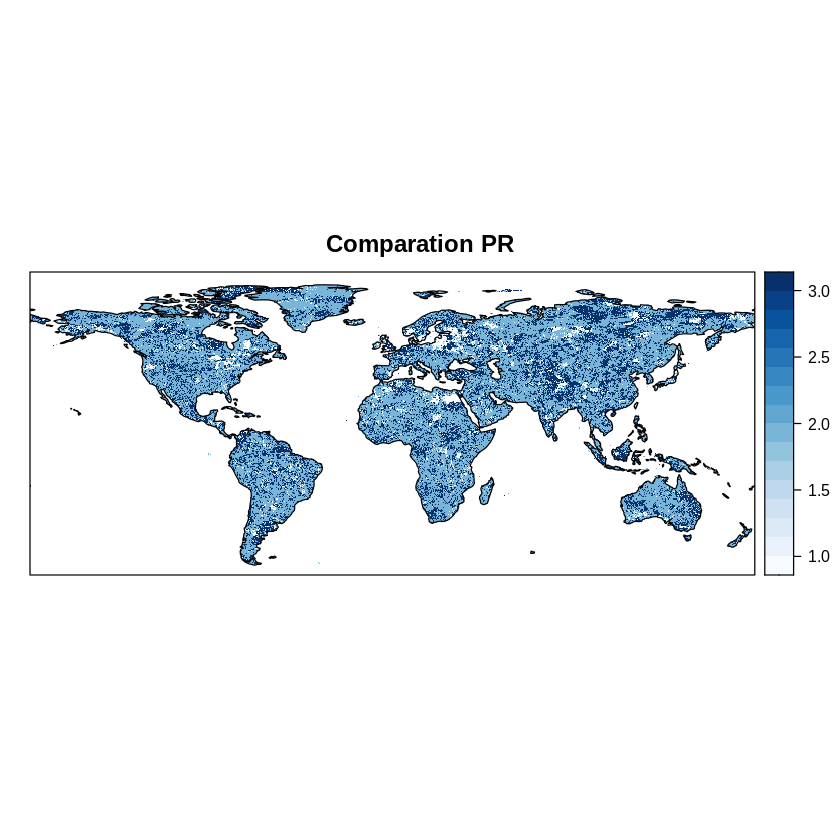

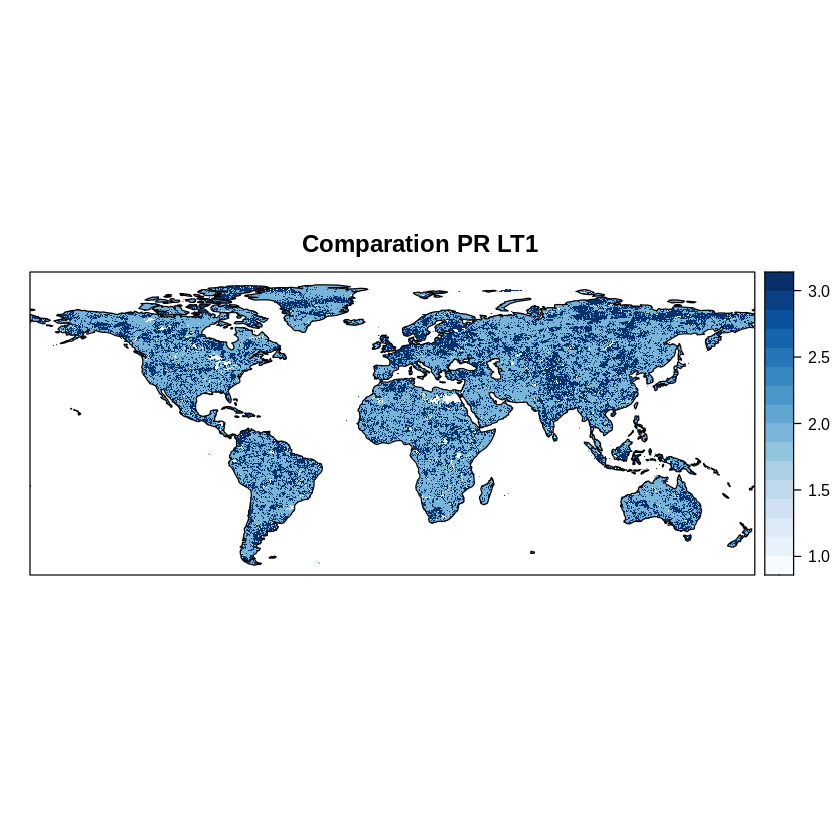

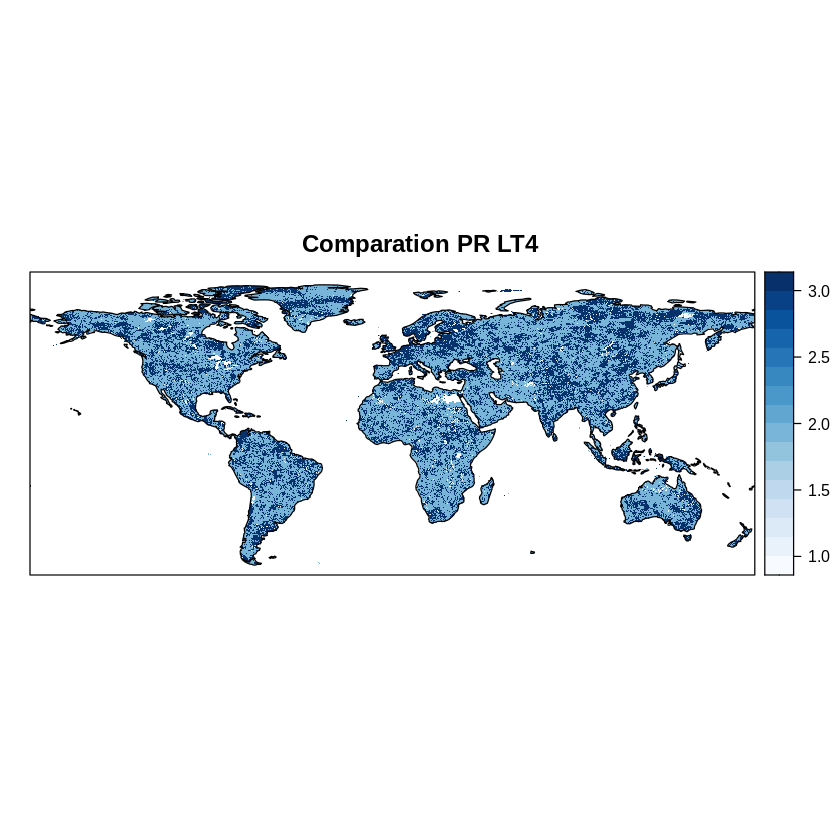

In [17]:
spatialPlot(comparation_pr, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation PR')
spatialPlot(comparation_pr_LT1, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation PR LT1')
spatialPlot(comparation_pr_LT4, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation PR LT4')

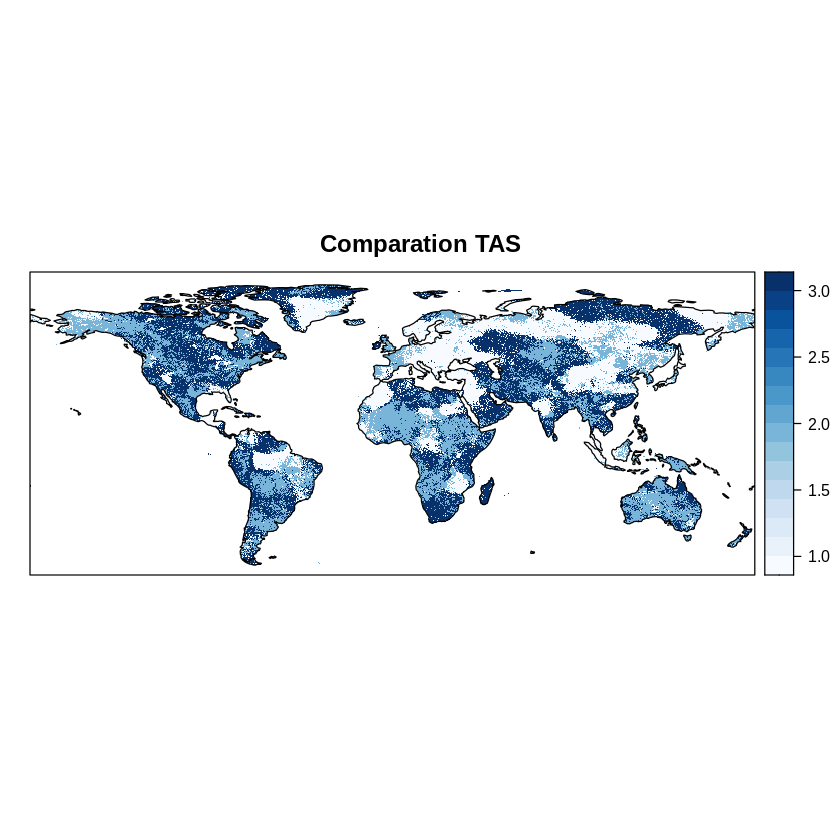

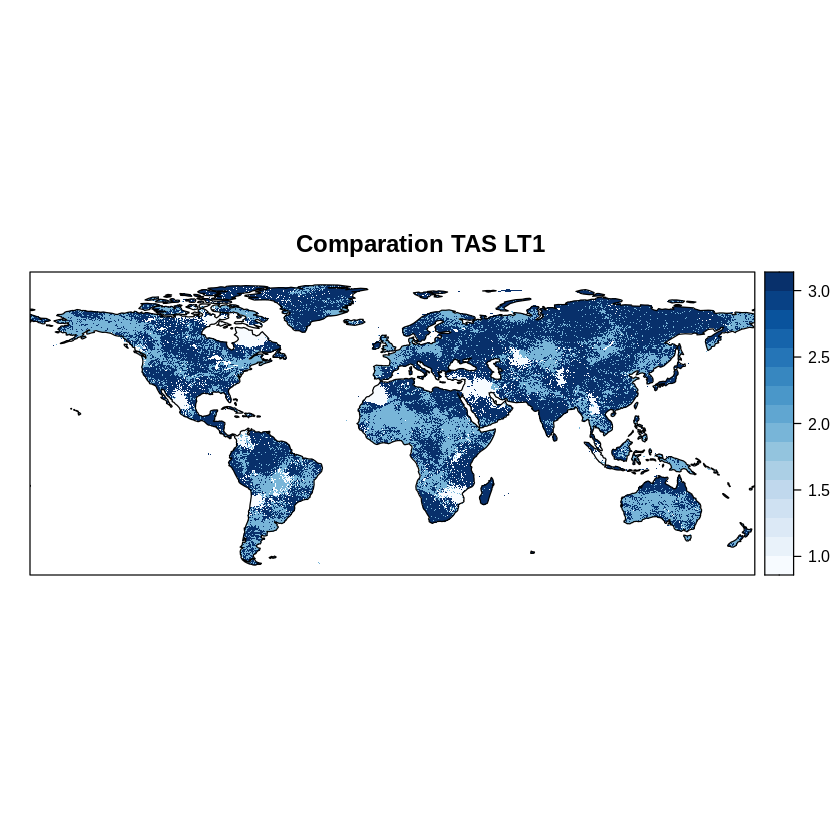

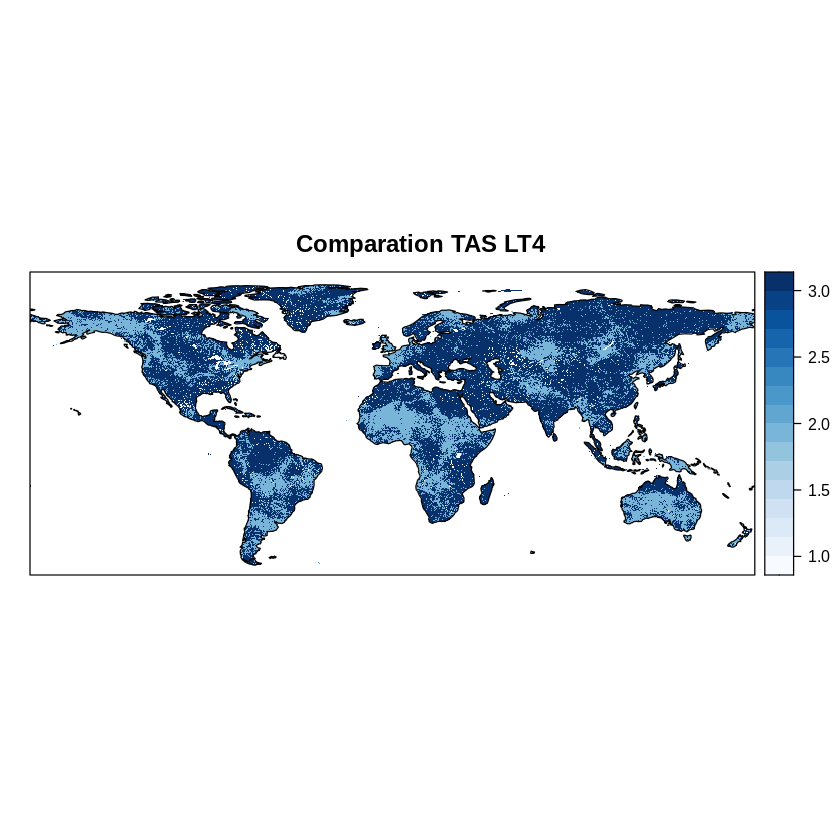

In [18]:
spatialPlot(comparation_tas, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation TAS')
spatialPlot(comparation_tas_LT1, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation TAS LT1')
spatialPlot(comparation_tas_LT4, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation TAS LT4')

## SON

In [19]:
load("./son/predict_pr_regression.rda",verbose = T)
load("./son/predict_pr_regression_LT1.rda",verbose = T)
load("./son/predict_pr_regression_LT4.rda",verbose = T)
load("./son/predict_tas_regression.rda",verbose = T)
load("./son/predict_tas_regression_LT1.rda",verbose = T)
load("./son/predict_tas_regression_LT4.rda",verbose = T)

Loading objects:
  predict_pr_regression
Loading objects:
  predict_pr_regression_LT1
Loading objects:
  predict_pr_regression_LT4
Loading objects:
  predict_tas_regression
Loading objects:
  predict_tas_regression_LT1
Loading objects:
  predict_tas_regression_LT4


In [20]:
rmse_pr_regression = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_regression = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_regression_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_regression_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_regression_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_regression_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
for(i in 1:length(data_JJA$xyCoords$x)){
    for(j in 1:length(data_JJA$xyCoords$y)){
        if(length(which(is.na(data_JJA$Data[,j,i])==FALSE))>2){
            rmse_pr_regression[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_regression$Data[,j,i])
            acc_pr_regression[j,i] = acc(data_JJA$Data[,j,i],predict_pr_regression$Data[,j,i])
            
            rmse_pr_regression_LT1[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_regression_LT1$Data[,j,i])
            acc_pr_regression_LT1[j,i] = acc(data_JJA$Data[,j,i],predict_pr_regression_LT1$Data[,j,i])
            
            rmse_pr_regression_LT4[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_regression_LT4$Data[,j,i])
            acc_pr_regression_LT4[j,i] = acc(data_JJA$Data[,j,i],predict_pr_regression_LT4$Data[,j,i])
            
       }
    }
}

rmse_tas_regression = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_regression= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_regression_LT1 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_regression_LT1= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_regression_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_regression_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
for(i in 1:length(data_JJA_temp$xyCoords$x)){
    for(j in 1:length(data_JJA_temp$xyCoords$y)){
        if(length(which(is.na(data_JJA_temp$Data[,j,i])==FALSE))>2){
            rmse_tas_regression[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_regression$Data[,j,i])
            acc_tas_regression[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_regression$Data[,j,i])
            
            rmse_tas_regression_LT1[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_regression_LT1$Data[,j,i])
            acc_tas_regression_LT1[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_regression_LT1$Data[,j,i])
            
            rmse_tas_regression_LT4[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_regression_LT4$Data[,j,i])
            acc_tas_regression_LT4[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_regression_LT4$Data[,j,i])
       }
    }
}

In [21]:
load("./son/predict_pr_tree.rda",verbose = T)
load("./son/predict_pr_tree_LT1.rda",verbose = T)
load("./son/predict_pr_tree_LT4.rda",verbose = T)
load("./son/predict_tas_tree.rda",verbose = T)
load("./son/predict_tas_tree_LT1.rda",verbose = T)
load("./son/predict_tas_tree_LT4.rda",verbose = T)

Loading objects:
  predict_pr_tree
Loading objects:
  predict_pr_tree_LT1
Loading objects:
  predict_pr_tree_LT4
Loading objects:
  predict_tas_tree
Loading objects:
  predict_tas_tree_LT1
Loading objects:
  predict_tas_tree_LT4


In [22]:
rmse_pr_tree = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_tree = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_tree_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_tree_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_tree_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_tree_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
for(i in 1:length(data_JJA$xyCoords$x)){
    for(j in 1:length(data_JJA$xyCoords$y)){
        if(length(which(is.na(data_JJA$Data[,j,i])==FALSE))>2){
            rmse_pr_tree[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_tree$Data[,j,i])
            acc_pr_tree[j,i] = acc(data_JJA$Data[,j,i],predict_pr_tree$Data[,j,i])
            
            rmse_pr_tree_LT1[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_tree_LT1$Data[,j,i])
            acc_pr_tree_LT1[j,i] = acc(data_JJA$Data[,j,i],predict_pr_tree_LT1$Data[,j,i])
            
            rmse_pr_tree_LT4[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_tree_LT4$Data[,j,i])
            acc_pr_tree_LT4[j,i] = acc(data_JJA$Data[,j,i],predict_pr_tree_LT4$Data[,j,i])
            
       }
    }
}

rmse_tas_tree = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_tree= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_tree_LT1 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_tree_LT1= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_tree_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_tree_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
for(i in 1:length(data_JJA_temp$xyCoords$x)){
    for(j in 1:length(data_JJA_temp$xyCoords$y)){
        if(length(which(is.na(data_JJA_temp$Data[,j,i])==FALSE))>2){
            rmse_tas_tree[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_tree$Data[,j,i])
            acc_tas_tree[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_tree$Data[,j,i])
            
            rmse_tas_tree_LT1[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_tree_LT1$Data[,j,i])
            acc_tas_tree_LT1[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_tree_LT1$Data[,j,i])
            
            rmse_tas_tree_LT4[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_tree_LT4$Data[,j,i])
            acc_tas_tree_LT4[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_tree_LT4$Data[,j,i])
       }
    }
}

In [23]:
load("./son/predict_pr_rf.rda",verbose = T)
load("./son/predict_pr_rf_LT1.rda",verbose = T)
load("./son/predict_pr_rf_LT4.rda",verbose = T)
load("./son/predict_tas_rf.rda",verbose = T)
load("./son/predict_tas_rf_LT1.rda",verbose = T)
load("./son/predict_tas_rf_LT4.rda",verbose = T)

Loading objects:
  predict_pr_rf
Loading objects:
  predict_pr_rf_LT1
Loading objects:
  predict_pr_rf_LT4
Loading objects:
  predict_tas_rf
Loading objects:
  predict_tas_rf_LT1
Loading objects:
  predict_tas_rf_LT4


In [24]:
rmse_pr_rf = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_rf = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_rf_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_rf_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_rf_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_rf_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
for(i in 1:length(data_JJA$xyCoords$x)){
    for(j in 1:length(data_JJA$xyCoords$y)){
        if(length(which(is.na(data_JJA$Data[,j,i])==FALSE))>2){
            rmse_pr_rf[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_rf$Data[,j,i])
            acc_pr_rf[j,i] = acc(data_JJA$Data[,j,i],predict_pr_rf$Data[,j,i])
            
            rmse_pr_rf_LT1[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_rf_LT1$Data[,j,i])
            acc_pr_rf_LT1[j,i] = acc(data_JJA$Data[,j,i],predict_pr_rf_LT1$Data[,j,i])
            
            rmse_pr_rf_LT4[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_rf_LT4$Data[,j,i])
            acc_pr_rf_LT4[j,i] = acc(data_JJA$Data[,j,i],predict_pr_rf_LT4$Data[,j,i])
            
       }
    }
}

rmse_tas_rf = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_rf= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_rf_LT1 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_rf_LT1= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_rf_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_rf_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
for(i in 1:length(data_JJA_temp$xyCoords$x)){
    for(j in 1:length(data_JJA_temp$xyCoords$y)){
        if(length(which(is.na(data_JJA_temp$Data[,j,i])==FALSE))>2){
            rmse_tas_rf[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_rf$Data[,j,i])
            acc_tas_rf[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_rf$Data[,j,i])
            
            rmse_tas_rf_LT1[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_rf_LT1$Data[,j,i])
            acc_tas_rf_LT1[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_rf_LT1$Data[,j,i])
            
            rmse_tas_rf_LT4[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_rf_LT4$Data[,j,i])
            acc_tas_rf_LT4[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_rf_LT4$Data[,j,i])
       }
    }
}

In [25]:
comparation_pr = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
comparation_pr_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
comparation_pr_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))

comparation_tas = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
comparation_tas_LT1 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
comparation_tas_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))

In [26]:
for(i in 1:length(data_JJA$xyCoords$x)){
    for(j in 1:length(data_JJA$xyCoords$y)){
        
        if(length(which(!is.na(c(rmse_pr_regression[j,i],rmse_pr_tree[j,i],rmse_pr_rf[j,i]))))>0){
            comp = which(c(rmse_pr_regression[j,i],rmse_pr_tree[j,i],rmse_pr_rf[j,i])== 
                     min(rmse_pr_regression[j,i],rmse_pr_tree[j,i],rmse_pr_rf[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_pr[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_pr_regression_LT1[j,i],rmse_pr_tree_LT1[j,i],rmse_pr_rf_LT1[j,i]))))>0){
            comp = which(c(rmse_pr_regression_LT1[j,i],rmse_pr_tree_LT1[j,i],rmse_pr_rf_LT1[j,i])== 
                     min(rmse_pr_regression_LT1[j,i],rmse_pr_tree_LT1[j,i],rmse_pr_rf_LT1[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_pr_LT1[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_pr_regression_LT4[j,i],rmse_pr_tree_LT4[j,i],rmse_pr_rf_LT4[j,i]))))>0){
            comp = which(c(rmse_pr_regression_LT4[j,i],rmse_pr_tree_LT4[j,i],rmse_pr_rf_LT4[j,i])== 
                     min(rmse_pr_regression_LT4[j,i],rmse_pr_tree_LT4[j,i],rmse_pr_rf_LT4[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_pr_LT4[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_tas_regression[j,i],rmse_tas_tree[j,i],rmse_tas_rf[j,i]))))>0){
            comp = which(c(rmse_tas_regression[j,i],rmse_tas_tree[j,i],rmse_tas_rf[j,i])== 
                     min(rmse_tas_regression[j,i],rmse_tas_tree[j,i],rmse_tas_rf[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_tas[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_tas_regression_LT1[j,i],rmse_tas_tree_LT1[j,i],rmse_tas_rf_LT1[j,i]))))>0){
            comp = which(c(rmse_tas_regression_LT1[j,i],rmse_tas_tree_LT1[j,i],rmse_tas_rf_LT1[j,i])== 
                     min(rmse_tas_regression_LT1[j,i],rmse_tas_tree_LT1[j,i],rmse_tas_rf_LT1[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_tas_LT1[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_tas_regression_LT4[j,i],rmse_tas_tree_LT4[j,i],rmse_tas_rf_LT4[j,i]))))>0){
            comp = which(c(rmse_tas_regression_LT4[j,i],rmse_tas_tree_LT4[j,i],rmse_tas_rf_LT4[j,i])== 
                     min(rmse_tas_regression_LT4[j,i],rmse_tas_tree_LT4[j,i],rmse_tas_rf_LT4[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_tas_LT4[j,i] = comp
            }
            
        }
        
    }
}

In [27]:
library(RColorBrewer)
colstx <- rev(brewer.pal(n = 9, "Spectral"))
colsindex <- rev(brewer.pal(n = 9, "RdYlBu"))
colsdelta <- brewer.pal(n = 9, "Reds")
colsbias <- brewer.pal(n = 9, "PiYG")
colssd <- brewer.pal(n = 9, "Blues")

In [28]:
makeC4R = function(data, template) {  # creates a C4R object from the "data" matrix
  C4R = template; C4R$Data = data; attributes(C4R$Data) = attributes(template$Data)
  return(C4R)
}
template = subsetDimension(data_JJA, dimension = "time", indices = 1)
comparation_pr= makeC4R(comparation_pr,template)
comparation_pr_LT1 = makeC4R(comparation_pr_LT1,template)
comparation_pr_LT4= makeC4R(comparation_pr_LT4,template)

comparation_tas= makeC4R(comparation_tas,template)
comparation_tas_LT1 = makeC4R(comparation_tas_LT1,template)
comparation_tas_LT4= makeC4R(comparation_tas_LT4,template)

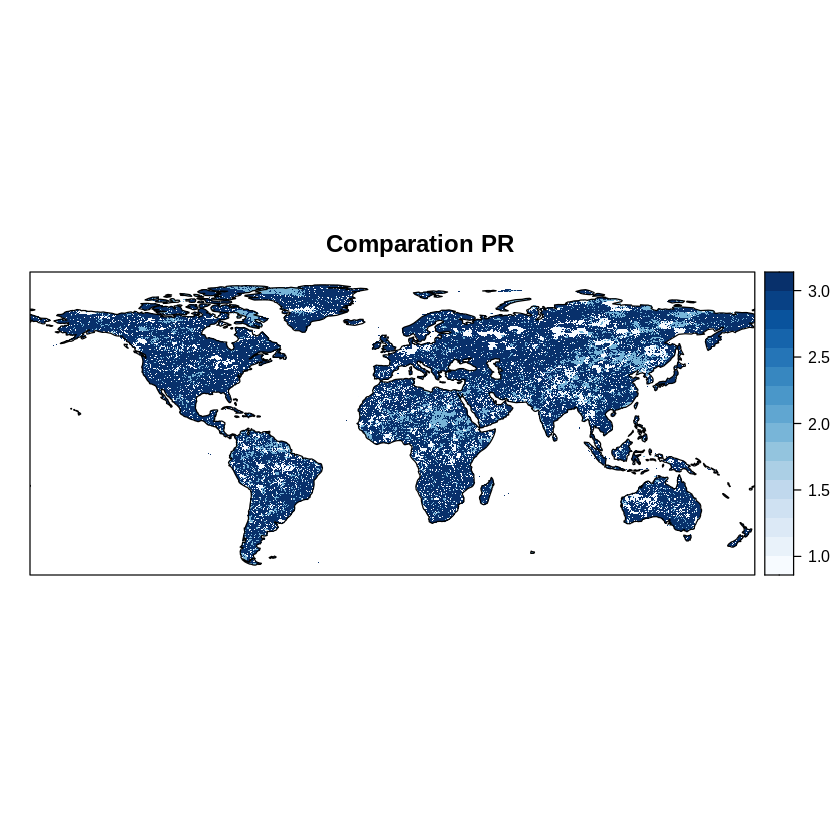

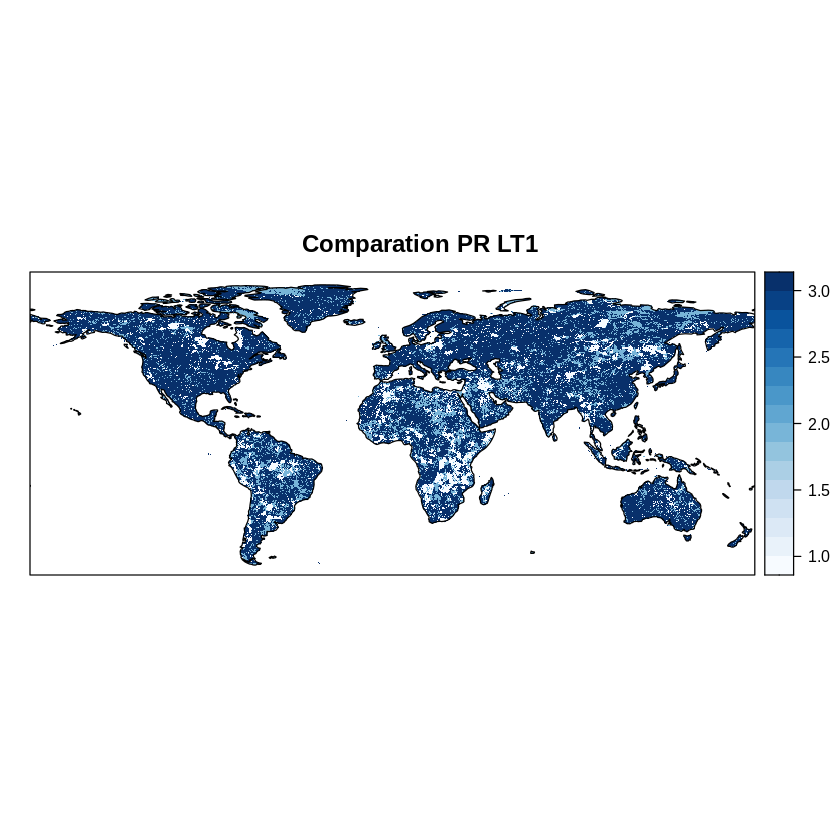

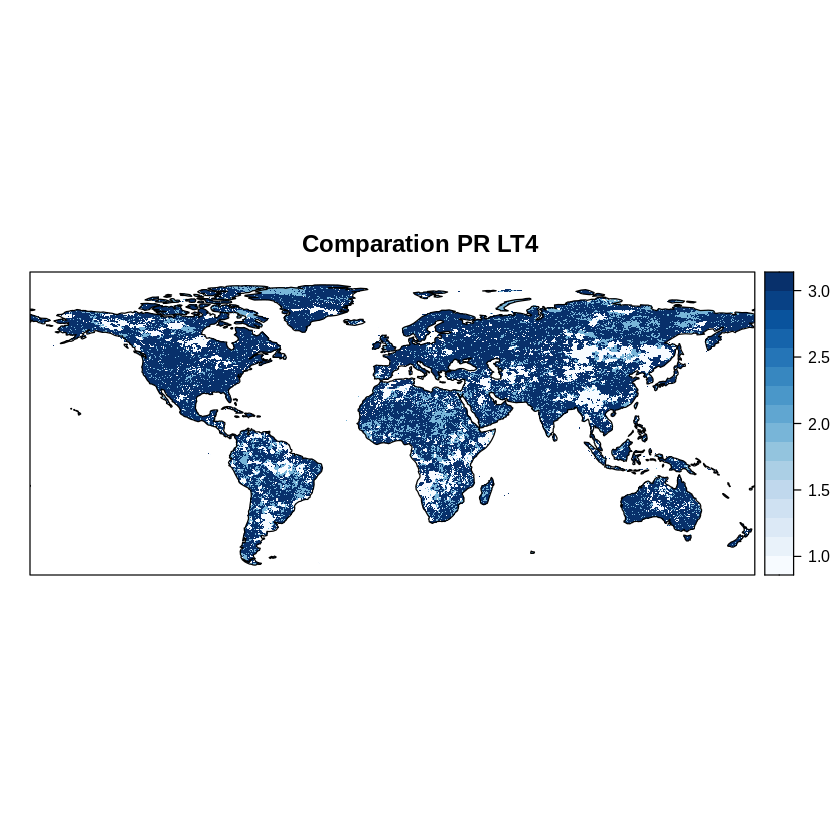

In [29]:
spatialPlot(comparation_pr, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation PR')
spatialPlot(comparation_pr_LT1, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation PR LT1')
spatialPlot(comparation_pr_LT4, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation PR LT4')

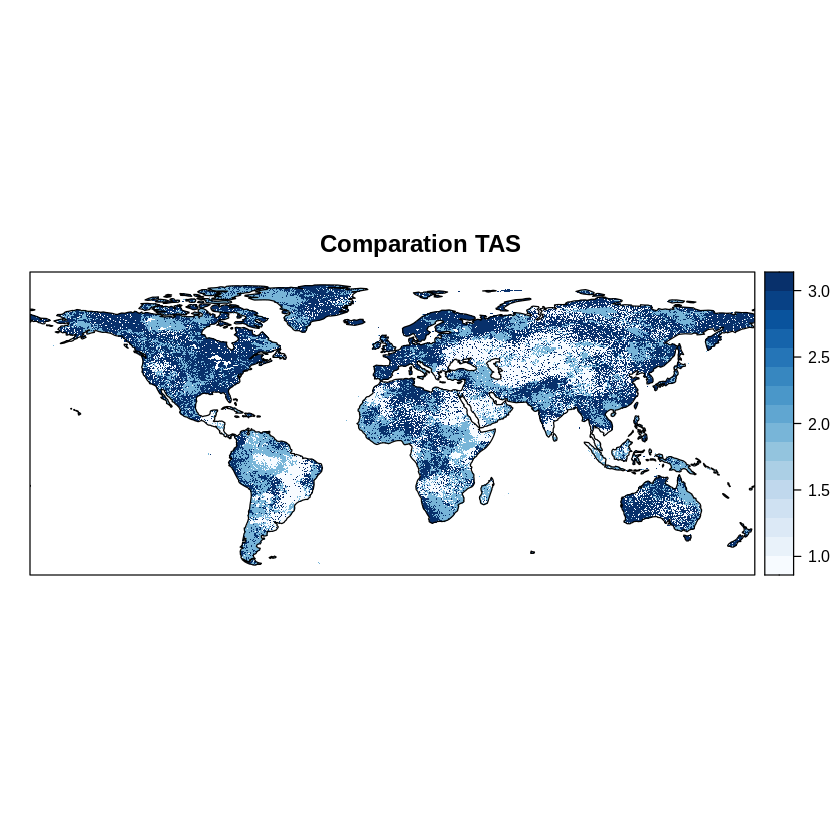

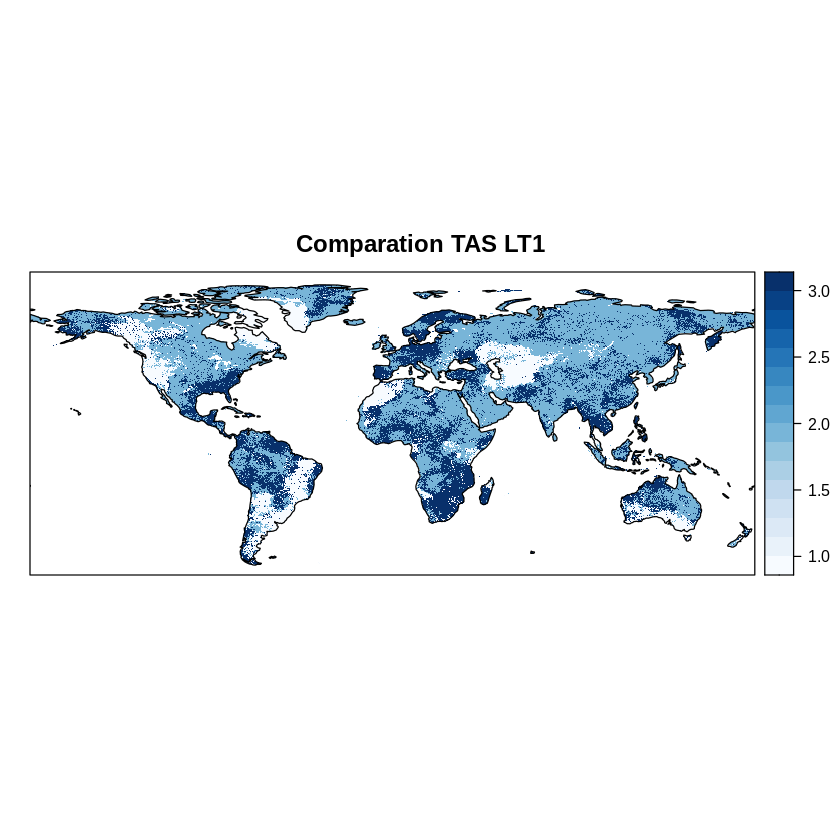

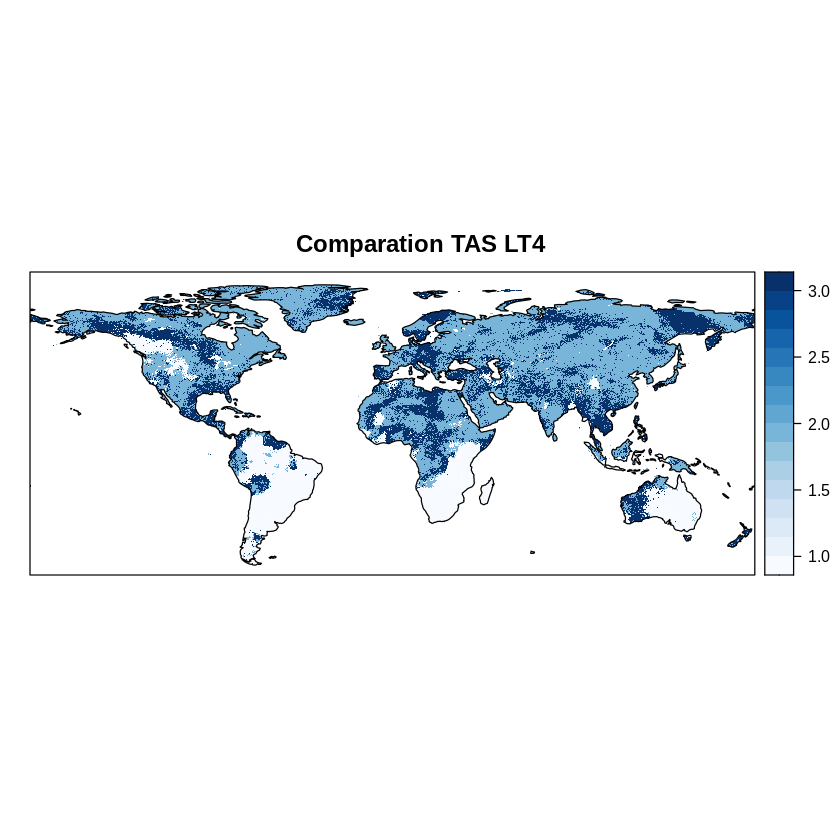

In [30]:
spatialPlot(comparation_tas, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation TAS')
spatialPlot(comparation_tas_LT1, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation TAS LT1')
spatialPlot(comparation_tas_LT4, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation TAS LT4')

## MAM

In [10]:
load("./MAM/predict_pr_regression.rda",verbose = T)
load("./MAM/predict_pr_regression_LT1.rda",verbose = T)
load("./MAM/predict_pr_regression_LT4.rda",verbose = T)
load("./MAM/predict_tas_regression.rda",verbose = T)
load("./MAM/predict_tas_regression_LT1.rda",verbose = T)
load("./MAM/predict_tas_regression_LT4.rda",verbose = T)

Loading objects:
  predict_pr_regression
Loading objects:
  predict_pr_regression_LT1
Loading objects:
  predict_pr_regression_LT4
Loading objects:
  predict_tas_regression
Loading objects:
  predict_tas_regression_LT1
Loading objects:
  predict_tas_regression_LT4


In [11]:
rmse_pr_regression = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_regression = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_regression_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_regression_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_regression_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_regression_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
for(i in 1:length(data_JJA$xyCoords$x)){
    for(j in 1:length(data_JJA$xyCoords$y)){
        if(length(which(is.na(data_JJA$Data[,j,i])==FALSE))>2){
            rmse_pr_regression[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_regression$Data[,j,i])
            acc_pr_regression[j,i] = acc(data_JJA$Data[,j,i],predict_pr_regression$Data[,j,i])
            
            rmse_pr_regression_LT1[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_regression_LT1$Data[,j,i])
            acc_pr_regression_LT1[j,i] = acc(data_JJA$Data[,j,i],predict_pr_regression_LT1$Data[,j,i])
            
            rmse_pr_regression_LT4[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_regression_LT4$Data[,j,i])
            acc_pr_regression_LT4[j,i] = acc(data_JJA$Data[,j,i],predict_pr_regression_LT4$Data[,j,i])
            
       }
    }
}

rmse_tas_regression = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_regression= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_regression_LT1 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_regression_LT1= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_regression_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_regression_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
for(i in 1:length(data_JJA_temp$xyCoords$x)){
    for(j in 1:length(data_JJA_temp$xyCoords$y)){
        if(length(which(is.na(data_JJA_temp$Data[,j,i])==FALSE))>2){
            rmse_tas_regression[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_regression$Data[,j,i])
            acc_tas_regression[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_regression$Data[,j,i])
            
            rmse_tas_regression_LT1[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_regression_LT1$Data[,j,i])
            acc_tas_regression_LT1[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_regression_LT1$Data[,j,i])
            
            rmse_tas_regression_LT4[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_regression_LT4$Data[,j,i])
            acc_tas_regression_LT4[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_regression_LT4$Data[,j,i])
       }
    }
}

In [12]:
load("./MAM/predict_pr_tree.rda",verbose = T)
load("./MAM/predict_pr_tree_LT1.rda",verbose = T)
load("./MAM/predict_pr_tree_LT4.rda",verbose = T)
load("./MAM/predict_tas_tree.rda",verbose = T)
load("./MAM/predict_tas_tree_LT1.rda",verbose = T)
load("./MAM/predict_tas_tree_LT4.rda",verbose = T)

Loading objects:
  predict_pr_tree
Loading objects:
  predict_pr_tree_LT1
Loading objects:
  predict_pr_tree_LT4
Loading objects:
  predict_tas_tree
Loading objects:
  predict_tas_tree_LT1
Loading objects:
  predict_tas_tree_LT4


In [13]:
rmse_pr_tree = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_tree = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_tree_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_tree_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_tree_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_tree_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
for(i in 1:length(data_JJA$xyCoords$x)){
    for(j in 1:length(data_JJA$xyCoords$y)){
        if(length(which(is.na(data_JJA$Data[,j,i])==FALSE))>2){
            rmse_pr_tree[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_tree$Data[,j,i])
            acc_pr_tree[j,i] = acc(data_JJA$Data[,j,i],predict_pr_tree$Data[,j,i])
            
            rmse_pr_tree_LT1[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_tree_LT1$Data[,j,i])
            acc_pr_tree_LT1[j,i] = acc(data_JJA$Data[,j,i],predict_pr_tree_LT1$Data[,j,i])
            
            rmse_pr_tree_LT4[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_tree_LT4$Data[,j,i])
            acc_pr_tree_LT4[j,i] = acc(data_JJA$Data[,j,i],predict_pr_tree_LT4$Data[,j,i])
            
       }
    }
}

rmse_tas_tree = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_tree= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_tree_LT1 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_tree_LT1= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_tree_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_tree_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
for(i in 1:length(data_JJA_temp$xyCoords$x)){
    for(j in 1:length(data_JJA_temp$xyCoords$y)){
        if(length(which(is.na(data_JJA_temp$Data[,j,i])==FALSE))>2){
            rmse_tas_tree[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_tree$Data[,j,i])
            acc_tas_tree[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_tree$Data[,j,i])
            
            rmse_tas_tree_LT1[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_tree_LT1$Data[,j,i])
            acc_tas_tree_LT1[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_tree_LT1$Data[,j,i])
            
            rmse_tas_tree_LT4[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_tree_LT4$Data[,j,i])
            acc_tas_tree_LT4[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_tree_LT4$Data[,j,i])
       }
    }
}

In [14]:
load("./MAM/predict_pr_rf.rda",verbose = T)
load("./MAM/predict_pr_rf_LT1.rda",verbose = T)
load("./MAM/predict_pr_rf_LT4.rda",verbose = T)
load("./MAM/predict_tas_rf.rda",verbose = T)
load("./MAM/predict_tas_rf_LT1.rda",verbose = T)
load("./MAM/predict_tas_rf_LT4.rda",verbose = T)

Loading objects:
  predict_pr_rf
Loading objects:
  predict_pr_rf_LT1
Loading objects:
  predict_pr_rf_LT4
Loading objects:
  predict_tas_rf
Loading objects:
  predict_tas_rf_LT1
Loading objects:
  predict_tas_rf_LT4


In [15]:
rmse_pr_rf = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_rf = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_rf_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_rf_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_rf_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_rf_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
for(i in 1:length(data_JJA$xyCoords$x)){
    for(j in 1:length(data_JJA$xyCoords$y)){
        if(length(which(is.na(data_JJA$Data[,j,i])==FALSE))>2){
            rmse_pr_rf[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_rf$Data[,j,i])
            acc_pr_rf[j,i] = acc(data_JJA$Data[,j,i],predict_pr_rf$Data[,j,i])
            
            rmse_pr_rf_LT1[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_rf_LT1$Data[,j,i])
            acc_pr_rf_LT1[j,i] = acc(data_JJA$Data[,j,i],predict_pr_rf_LT1$Data[,j,i])
            
            rmse_pr_rf_LT4[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_rf_LT4$Data[,j,i])
            acc_pr_rf_LT4[j,i] = acc(data_JJA$Data[,j,i],predict_pr_rf_LT4$Data[,j,i])
            
       }
    }
}

rmse_tas_rf = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_rf= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_rf_LT1 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_rf_LT1= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_rf_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_rf_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
for(i in 1:length(data_JJA_temp$xyCoords$x)){
    for(j in 1:length(data_JJA_temp$xyCoords$y)){
        if(length(which(is.na(data_JJA_temp$Data[,j,i])==FALSE))>2){
            rmse_tas_rf[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_rf$Data[,j,i])
            acc_tas_rf[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_rf$Data[,j,i])
            
            rmse_tas_rf_LT1[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_rf_LT1$Data[,j,i])
            acc_tas_rf_LT1[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_rf_LT1$Data[,j,i])
            
            rmse_tas_rf_LT4[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_rf_LT4$Data[,j,i])
            acc_tas_rf_LT4[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_rf_LT4$Data[,j,i])
       }
    }
}

In [16]:
comparation_pr = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
comparation_pr_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
comparation_pr_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))

comparation_tas = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
comparation_tas_LT1 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
comparation_tas_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))

In [17]:
for(i in 1:length(data_JJA$xyCoords$x)){
    for(j in 1:length(data_JJA$xyCoords$y)){
        
        if(length(which(!is.na(c(rmse_pr_regression[j,i],rmse_pr_tree[j,i],rmse_pr_rf[j,i]))))>0){
            comp = which(c(rmse_pr_regression[j,i],rmse_pr_tree[j,i],rmse_pr_rf[j,i])== 
                     min(rmse_pr_regression[j,i],rmse_pr_tree[j,i],rmse_pr_rf[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_pr[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_pr_regression_LT1[j,i],rmse_pr_tree_LT1[j,i],rmse_pr_rf_LT1[j,i]))))>0){
            comp = which(c(rmse_pr_regression_LT1[j,i],rmse_pr_tree_LT1[j,i],rmse_pr_rf_LT1[j,i])== 
                     min(rmse_pr_regression_LT1[j,i],rmse_pr_tree_LT1[j,i],rmse_pr_rf_LT1[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_pr_LT1[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_pr_regression_LT4[j,i],rmse_pr_tree_LT4[j,i],rmse_pr_rf_LT4[j,i]))))>0){
            comp = which(c(rmse_pr_regression_LT4[j,i],rmse_pr_tree_LT4[j,i],rmse_pr_rf_LT4[j,i])== 
                     min(rmse_pr_regression_LT4[j,i],rmse_pr_tree_LT4[j,i],rmse_pr_rf_LT4[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_pr_LT4[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_tas_regression[j,i],rmse_tas_tree[j,i],rmse_tas_rf[j,i]))))>0){
            comp = which(c(rmse_tas_regression[j,i],rmse_tas_tree[j,i],rmse_tas_rf[j,i])== 
                     min(rmse_tas_regression[j,i],rmse_tas_tree[j,i],rmse_tas_rf[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_tas[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_tas_regression_LT1[j,i],rmse_tas_tree_LT1[j,i],rmse_tas_rf_LT1[j,i]))))>0){
            comp = which(c(rmse_tas_regression_LT1[j,i],rmse_tas_tree_LT1[j,i],rmse_tas_rf_LT1[j,i])== 
                     min(rmse_tas_regression_LT1[j,i],rmse_tas_tree_LT1[j,i],rmse_tas_rf_LT1[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_tas_LT1[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_tas_regression_LT4[j,i],rmse_tas_tree_LT4[j,i],rmse_tas_rf_LT4[j,i]))))>0){
            comp = which(c(rmse_tas_regression_LT4[j,i],rmse_tas_tree_LT4[j,i],rmse_tas_rf_LT4[j,i])== 
                     min(rmse_tas_regression_LT4[j,i],rmse_tas_tree_LT4[j,i],rmse_tas_rf_LT4[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_tas_LT4[j,i] = comp
            }
            
        }
        
    }
}

In [18]:
library(RColorBrewer)
colstx <- rev(brewer.pal(n = 9, "Spectral"))
colsindex <- rev(brewer.pal(n = 9, "RdYlBu"))
colsdelta <- brewer.pal(n = 9, "Reds")
colsbias <- brewer.pal(n = 9, "PiYG")
colssd <- brewer.pal(n = 9, "Blues")

In [19]:
makeC4R = function(data, template) {  # creates a C4R object from the "data" matrix
  C4R = template; C4R$Data = data; attributes(C4R$Data) = attributes(template$Data)
  return(C4R)
}
template = subsetDimension(data_JJA, dimension = "time", indices = 1)
comparation_pr= makeC4R(comparation_pr,template)
comparation_pr_LT1 = makeC4R(comparation_pr_LT1,template)
comparation_pr_LT4= makeC4R(comparation_pr_LT4,template)

comparation_tas= makeC4R(comparation_tas,template)
comparation_tas_LT1 = makeC4R(comparation_tas_LT1,template)
comparation_tas_LT4= makeC4R(comparation_tas_LT4,template)

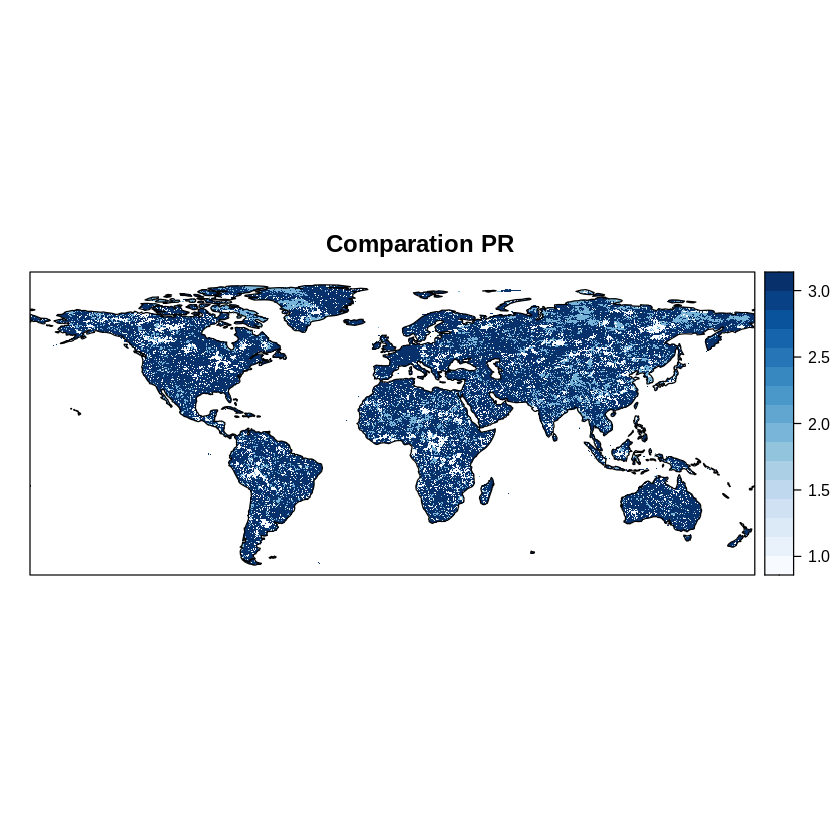

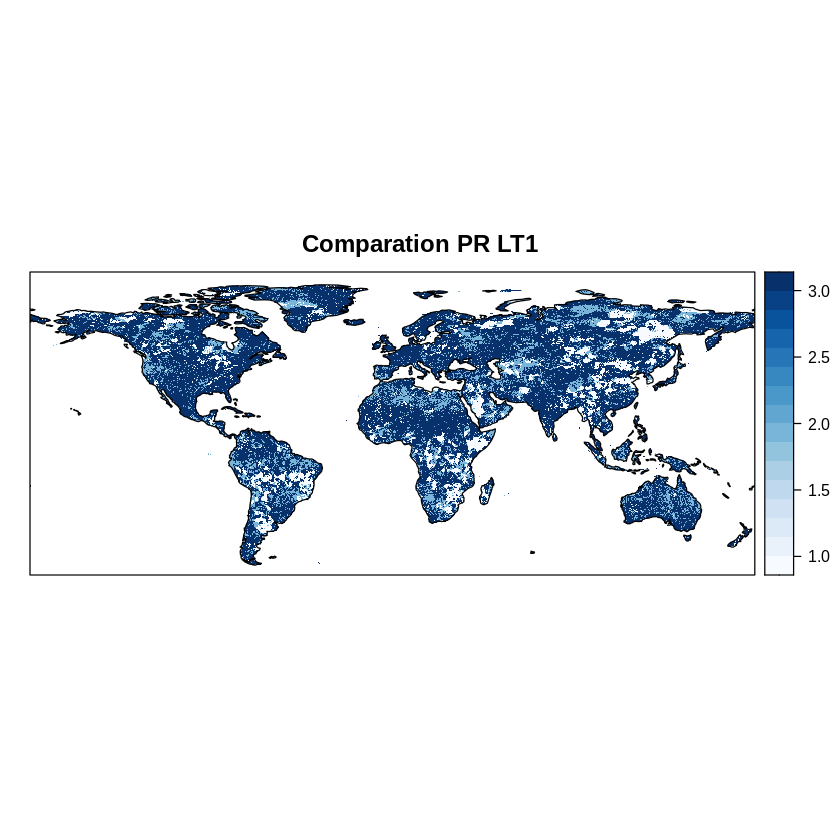

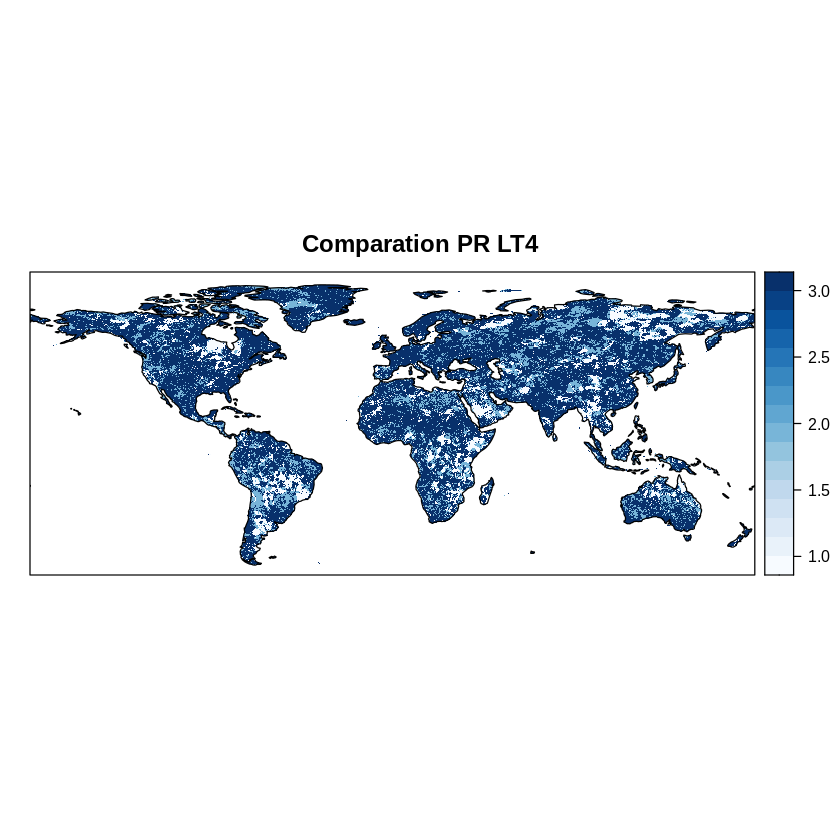

In [20]:
spatialPlot(comparation_pr, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation PR')
spatialPlot(comparation_pr_LT1, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation PR LT1')
spatialPlot(comparation_pr_LT4, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation PR LT4')

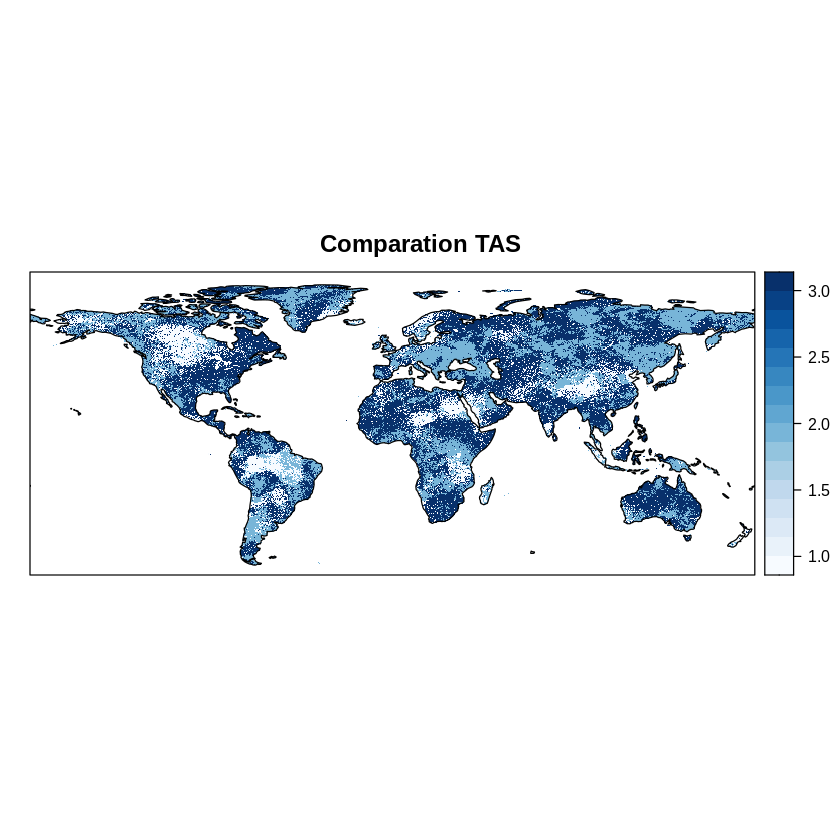

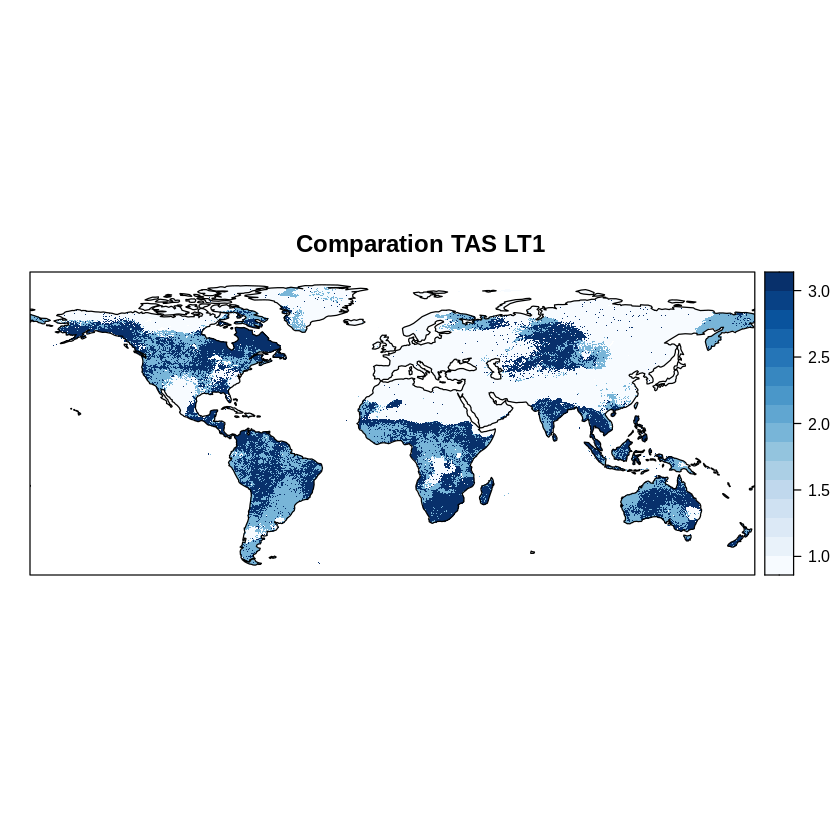

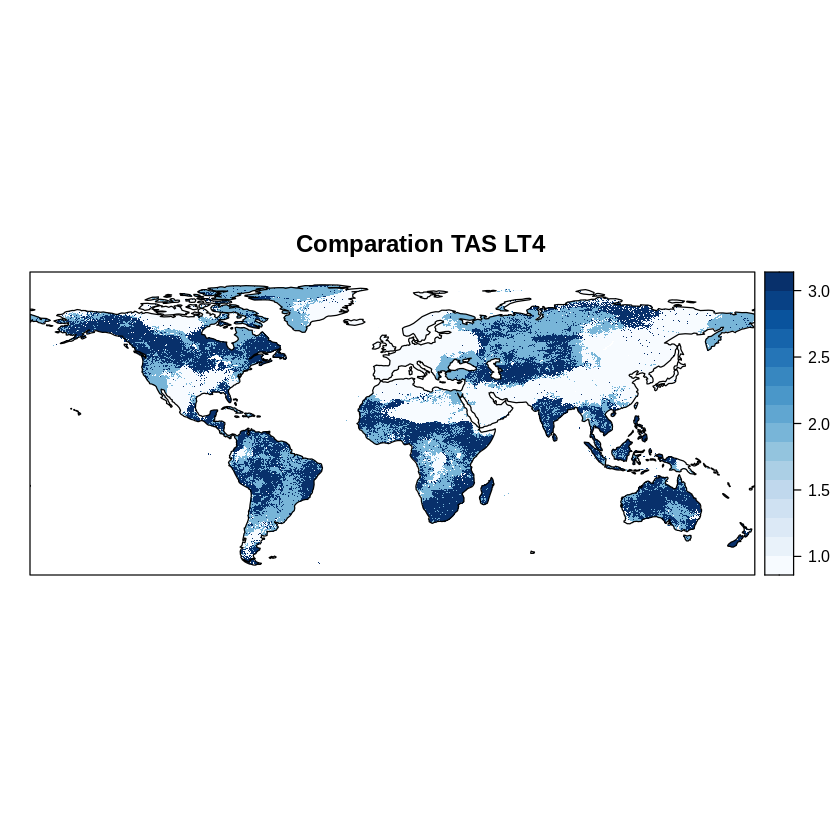

In [21]:
spatialPlot(comparation_tas, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation TAS')
spatialPlot(comparation_tas_LT1, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation TAS LT1')
spatialPlot(comparation_tas_LT4, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation TAS LT4')

## DJF


In [22]:
load("./DJF/predict_pr_regression.rda",verbose = T)
load("./DJF/predict_pr_regression_LT1.rda",verbose = T)
load("./DJF/predict_pr_regression_LT4.rda",verbose = T)
load("./DJF/predict_tas_regression.rda",verbose = T)
load("./DJF/predict_tas_regression_LT1.rda",verbose = T)
load("./DJF/predict_tas_regression_LT4.rda",verbose = T)

Loading objects:
  predict_pr_regression
Loading objects:
  predict_pr_regression_LT1
Loading objects:
  predict_pr_regression_LT4
Loading objects:
  predict_tas_regression
Loading objects:
  predict_tas_regression_LT1
Loading objects:
  predict_tas_regression_LT4


In [23]:
rmse_pr_regression = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_regression = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_regression_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_regression_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_regression_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_regression_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
for(i in 1:length(data_JJA$xyCoords$x)){
    for(j in 1:length(data_JJA$xyCoords$y)){
        if(length(which(is.na(data_JJA$Data[,j,i])==FALSE))>2){
            rmse_pr_regression[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_regression$Data[,j,i])
            acc_pr_regression[j,i] = acc(data_JJA$Data[,j,i],predict_pr_regression$Data[,j,i])
            
            rmse_pr_regression_LT1[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_regression_LT1$Data[,j,i])
            acc_pr_regression_LT1[j,i] = acc(data_JJA$Data[,j,i],predict_pr_regression_LT1$Data[,j,i])
            
            rmse_pr_regression_LT4[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_regression_LT4$Data[,j,i])
            acc_pr_regression_LT4[j,i] = acc(data_JJA$Data[,j,i],predict_pr_regression_LT4$Data[,j,i])
            
       }
    }
}

rmse_tas_regression = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_regression= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_regression_LT1 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_regression_LT1= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_regression_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_regression_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
for(i in 1:length(data_JJA_temp$xyCoords$x)){
    for(j in 1:length(data_JJA_temp$xyCoords$y)){
        if(length(which(is.na(data_JJA_temp$Data[,j,i])==FALSE))>2){
            rmse_tas_regression[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_regression$Data[,j,i])
            acc_tas_regression[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_regression$Data[,j,i])
            
            rmse_tas_regression_LT1[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_regression_LT1$Data[,j,i])
            acc_tas_regression_LT1[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_regression_LT1$Data[,j,i])
            
            rmse_tas_regression_LT4[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_regression_LT4$Data[,j,i])
            acc_tas_regression_LT4[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_regression_LT4$Data[,j,i])
       }
    }
}

In [24]:
load("./DJF/predict_pr_tree.rda",verbose = T)
load("./DJF/predict_pr_tree_LT1.rda",verbose = T)
load("./DJF/predict_pr_tree_LT4.rda",verbose = T)
load("./DJF/predict_tas_tree.rda",verbose = T)
load("./DJF/predict_tas_tree_LT1.rda",verbose = T)
load("./DJF/predict_tas_tree_LT4.rda",verbose = T)

Loading objects:
  predict_pr_tree
Loading objects:
  predict_pr_tree_LT1
Loading objects:
  predict_pr_tree_LT4
Loading objects:
  predict_tas_tree
Loading objects:
  predict_tas_tree_LT1
Loading objects:
  predict_tas_tree_LT4


In [25]:
rmse_pr_tree = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_tree = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_tree_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_tree_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_tree_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_tree_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
for(i in 1:length(data_JJA$xyCoords$x)){
    for(j in 1:length(data_JJA$xyCoords$y)){
        if(length(which(is.na(data_JJA$Data[,j,i])==FALSE))>2){
            rmse_pr_tree[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_tree$Data[,j,i])
            acc_pr_tree[j,i] = acc(data_JJA$Data[,j,i],predict_pr_tree$Data[,j,i])
            
            rmse_pr_tree_LT1[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_tree_LT1$Data[,j,i])
            acc_pr_tree_LT1[j,i] = acc(data_JJA$Data[,j,i],predict_pr_tree_LT1$Data[,j,i])
            
            rmse_pr_tree_LT4[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_tree_LT4$Data[,j,i])
            acc_pr_tree_LT4[j,i] = acc(data_JJA$Data[,j,i],predict_pr_tree_LT4$Data[,j,i])
            
       }
    }
}

rmse_tas_tree = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_tree= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_tree_LT1 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_tree_LT1= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_tree_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_tree_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
for(i in 1:length(data_JJA_temp$xyCoords$x)){
    for(j in 1:length(data_JJA_temp$xyCoords$y)){
        if(length(which(is.na(data_JJA_temp$Data[,j,i])==FALSE))>2){
            rmse_tas_tree[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_tree$Data[,j,i])
            acc_tas_tree[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_tree$Data[,j,i])
            
            rmse_tas_tree_LT1[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_tree_LT1$Data[,j,i])
            acc_tas_tree_LT1[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_tree_LT1$Data[,j,i])
            
            rmse_tas_tree_LT4[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_tree_LT4$Data[,j,i])
            acc_tas_tree_LT4[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_tree_LT4$Data[,j,i])
       }
    }
}

In [26]:
load("./DJF/predict_pr_rf.rda",verbose = T)
load("./DJF/predict_pr_rf_LT1.rda",verbose = T)
load("./DJF/predict_pr_rf_LT4.rda",verbose = T)
load("./DJF/predict_tas_rf.rda",verbose = T)
load("./DJF/predict_tas_rf_LT1.rda",verbose = T)
load("./DJF/predict_tas_rf_LT4.rda",verbose = T)

Loading objects:
  predict_pr_rf
Loading objects:
  predict_pr_rf_LT1
Loading objects:
  predict_pr_rf_LT4
Loading objects:
  predict_tas_rf
Loading objects:
  predict_tas_rf_LT1
Loading objects:
  predict_tas_rf_LT4


In [27]:
rmse_pr_rf = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_rf = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_rf_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_rf_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
rmse_pr_rf_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
acc_pr_rf_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
for(i in 1:length(data_JJA$xyCoords$x)){
    for(j in 1:length(data_JJA$xyCoords$y)){
        if(length(which(is.na(data_JJA$Data[,j,i])==FALSE))>2){
            rmse_pr_rf[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_rf$Data[,j,i])
            acc_pr_rf[j,i] = acc(data_JJA$Data[,j,i],predict_pr_rf$Data[,j,i])
            
            rmse_pr_rf_LT1[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_rf_LT1$Data[,j,i])
            acc_pr_rf_LT1[j,i] = acc(data_JJA$Data[,j,i],predict_pr_rf_LT1$Data[,j,i])
            
            rmse_pr_rf_LT4[j,i] = rmse(data_JJA$Data[,j,i],predict_pr_rf_LT4$Data[,j,i])
            acc_pr_rf_LT4[j,i] = acc(data_JJA$Data[,j,i],predict_pr_rf_LT4$Data[,j,i])
            
       }
    }
}

rmse_tas_rf = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_rf= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_rf_LT1 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_rf_LT1= matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
rmse_tas_rf_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
acc_tas_rf_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
for(i in 1:length(data_JJA_temp$xyCoords$x)){
    for(j in 1:length(data_JJA_temp$xyCoords$y)){
        if(length(which(is.na(data_JJA_temp$Data[,j,i])==FALSE))>2){
            rmse_tas_rf[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_rf$Data[,j,i])
            acc_tas_rf[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_rf$Data[,j,i])
            
            rmse_tas_rf_LT1[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_rf_LT1$Data[,j,i])
            acc_tas_rf_LT1[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_rf_LT1$Data[,j,i])
            
            rmse_tas_rf_LT4[j,i] = rmse(data_JJA_temp$Data[,j,i],predict_tas_rf_LT4$Data[,j,i])
            acc_tas_rf_LT4[j,i] = acc(data_JJA_temp$Data[,j,i],predict_tas_rf_LT4$Data[,j,i])
       }
    }
}

In [28]:
comparation_pr = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
comparation_pr_LT1 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))
comparation_pr_LT4 = matrix(NA, nrow = length(data_JJA$xyCoords$y), ncol = length(data_JJA$xyCoords$x))

comparation_tas = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
comparation_tas_LT1 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))
comparation_tas_LT4 = matrix(NA, nrow = length(data_JJA_temp$xyCoords$y), ncol = length(data_JJA_temp$xyCoords$x))

In [29]:
for(i in 1:length(data_JJA$xyCoords$x)){
    for(j in 1:length(data_JJA$xyCoords$y)){
        
        if(length(which(!is.na(c(rmse_pr_regression[j,i],rmse_pr_tree[j,i],rmse_pr_rf[j,i]))))>0){
            comp = which(c(rmse_pr_regression[j,i],rmse_pr_tree[j,i],rmse_pr_rf[j,i])== 
                     min(rmse_pr_regression[j,i],rmse_pr_tree[j,i],rmse_pr_rf[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_pr[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_pr_regression_LT1[j,i],rmse_pr_tree_LT1[j,i],rmse_pr_rf_LT1[j,i]))))>0){
            comp = which(c(rmse_pr_regression_LT1[j,i],rmse_pr_tree_LT1[j,i],rmse_pr_rf_LT1[j,i])== 
                     min(rmse_pr_regression_LT1[j,i],rmse_pr_tree_LT1[j,i],rmse_pr_rf_LT1[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_pr_LT1[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_pr_regression_LT4[j,i],rmse_pr_tree_LT4[j,i],rmse_pr_rf_LT4[j,i]))))>0){
            comp = which(c(rmse_pr_regression_LT4[j,i],rmse_pr_tree_LT4[j,i],rmse_pr_rf_LT4[j,i])== 
                     min(rmse_pr_regression_LT4[j,i],rmse_pr_tree_LT4[j,i],rmse_pr_rf_LT4[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_pr_LT4[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_tas_regression[j,i],rmse_tas_tree[j,i],rmse_tas_rf[j,i]))))>0){
            comp = which(c(rmse_tas_regression[j,i],rmse_tas_tree[j,i],rmse_tas_rf[j,i])== 
                     min(rmse_tas_regression[j,i],rmse_tas_tree[j,i],rmse_tas_rf[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_tas[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_tas_regression_LT1[j,i],rmse_tas_tree_LT1[j,i],rmse_tas_rf_LT1[j,i]))))>0){
            comp = which(c(rmse_tas_regression_LT1[j,i],rmse_tas_tree_LT1[j,i],rmse_tas_rf_LT1[j,i])== 
                     min(rmse_tas_regression_LT1[j,i],rmse_tas_tree_LT1[j,i],rmse_tas_rf_LT1[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_tas_LT1[j,i] = comp
            }
            
        }
        
        if(length(which(!is.na(c(rmse_tas_regression_LT4[j,i],rmse_tas_tree_LT4[j,i],rmse_tas_rf_LT4[j,i]))))>0){
            comp = which(c(rmse_tas_regression_LT4[j,i],rmse_tas_tree_LT4[j,i],rmse_tas_rf_LT4[j,i])== 
                     min(rmse_tas_regression_LT4[j,i],rmse_tas_tree_LT4[j,i],rmse_tas_rf_LT4[j,i],na.rm = TRUE))
            if(length(comp)==1){
                comparation_tas_LT4[j,i] = comp
            }
            
        }
        
    }
}

In [30]:
library(RColorBrewer)
colstx <- rev(brewer.pal(n = 9, "Spectral"))
colsindex <- rev(brewer.pal(n = 9, "RdYlBu"))
colsdelta <- brewer.pal(n = 9, "Reds")
colsbias <- brewer.pal(n = 9, "PiYG")
colssd <- brewer.pal(n = 9, "Blues")

In [31]:
makeC4R = function(data, template) {  # creates a C4R object from the "data" matrix
  C4R = template; C4R$Data = data; attributes(C4R$Data) = attributes(template$Data)
  return(C4R)
}
template = subsetDimension(data_JJA, dimension = "time", indices = 1)
comparation_pr= makeC4R(comparation_pr,template)
comparation_pr_LT1 = makeC4R(comparation_pr_LT1,template)
comparation_pr_LT4= makeC4R(comparation_pr_LT4,template)

comparation_tas= makeC4R(comparation_tas,template)
comparation_tas_LT1 = makeC4R(comparation_tas_LT1,template)
comparation_tas_LT4= makeC4R(comparation_tas_LT4,template)

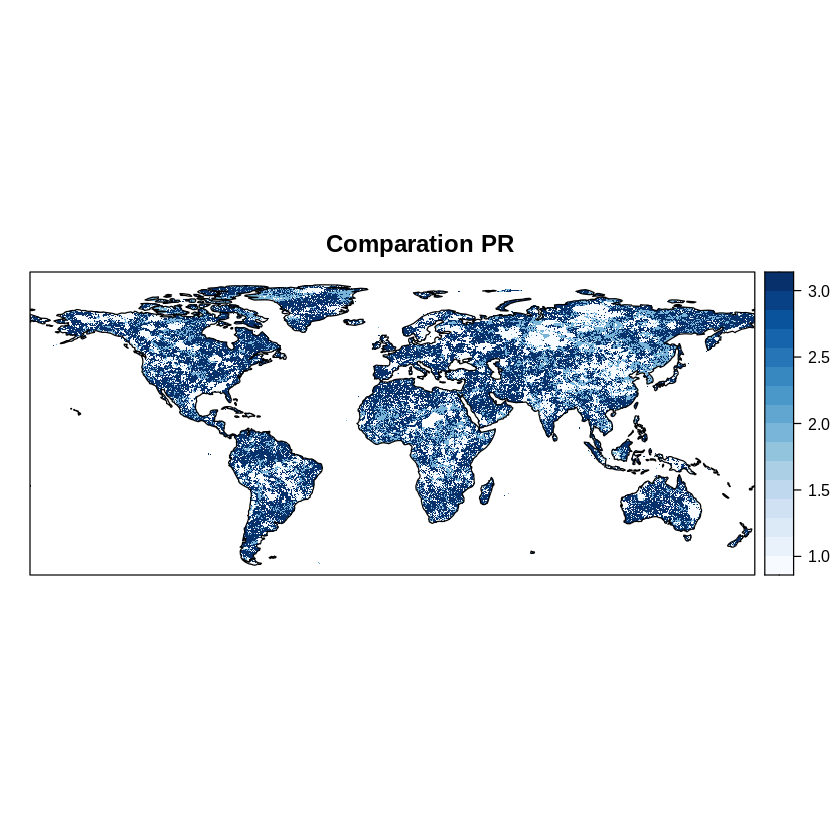

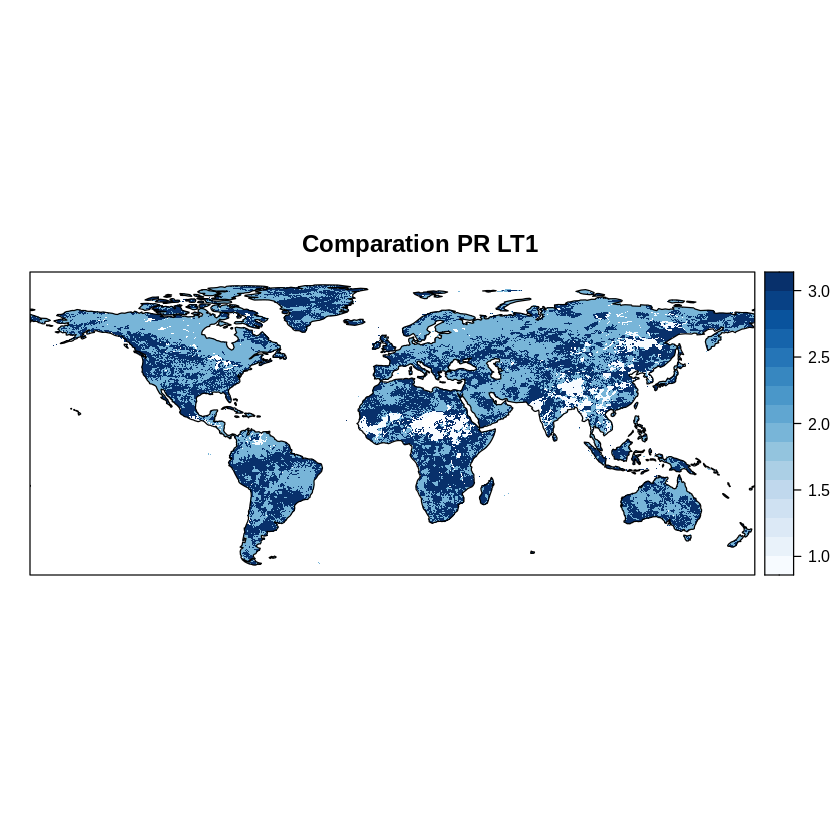

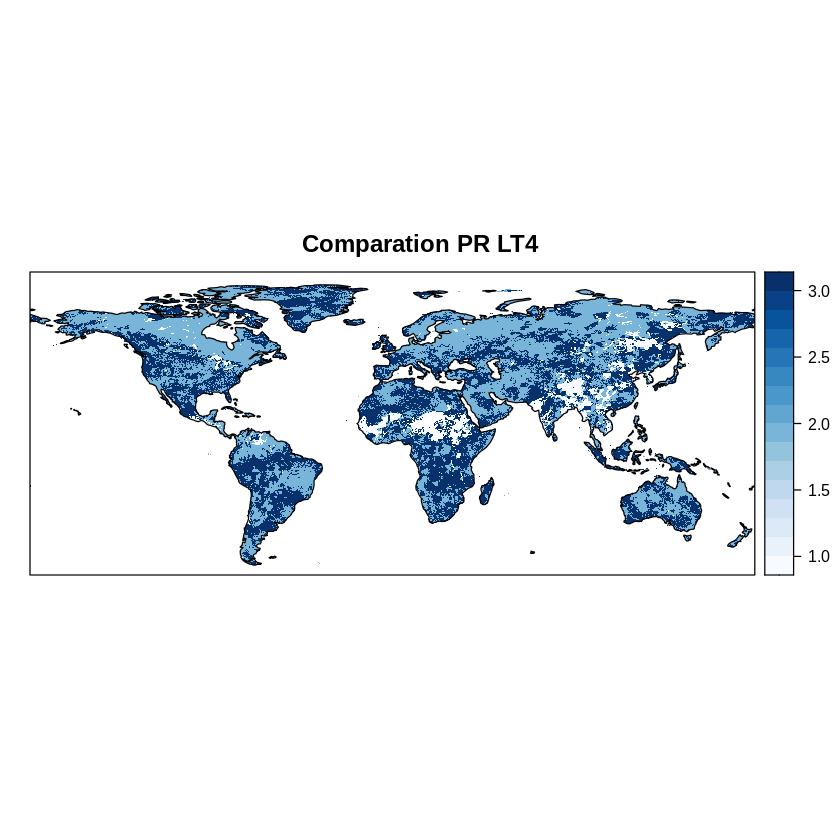

In [32]:
spatialPlot(comparation_pr, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation PR')
spatialPlot(comparation_pr_LT1, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation PR LT1')
spatialPlot(comparation_pr_LT4, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation PR LT4')

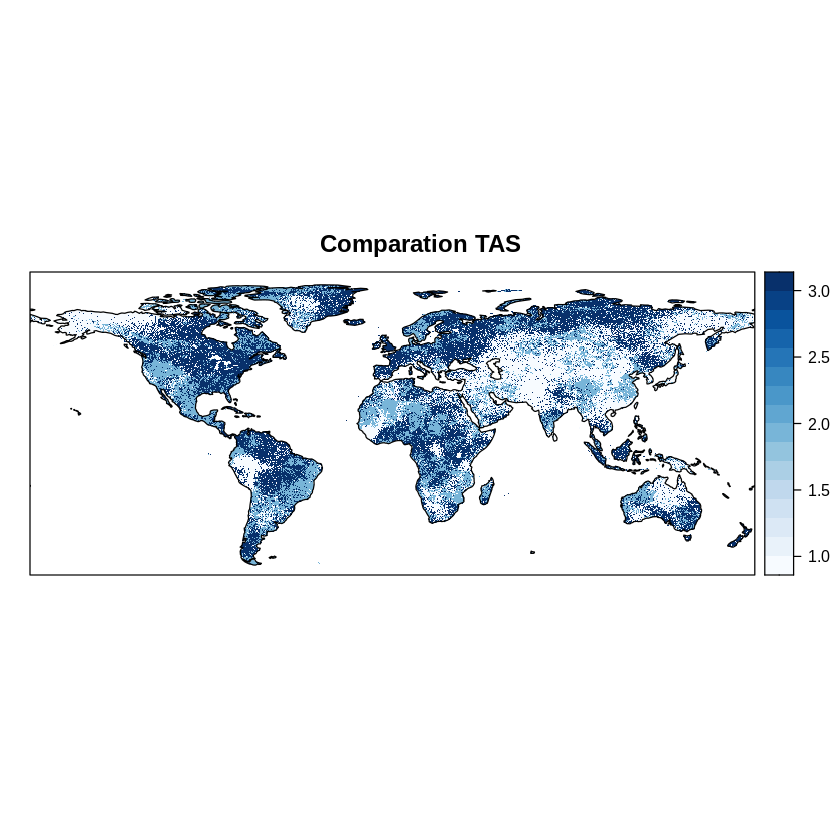

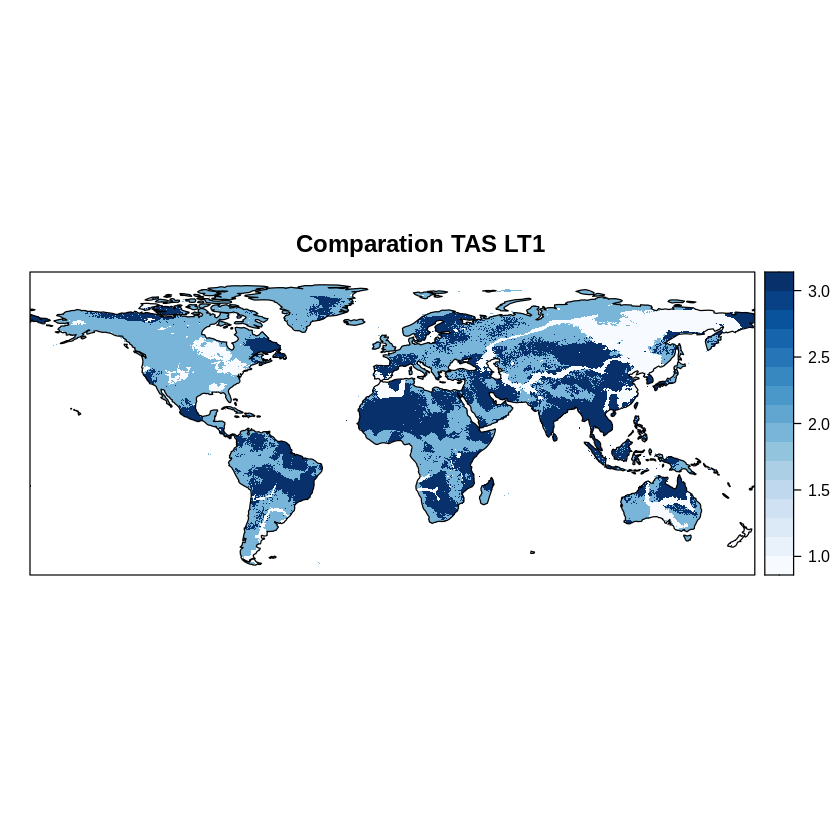

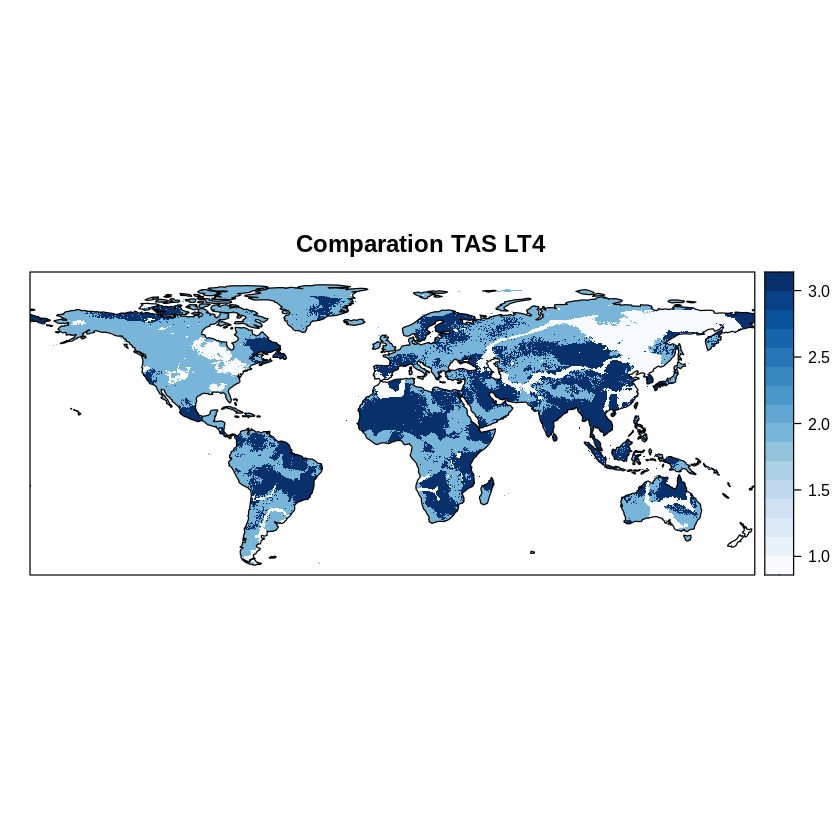

In [33]:
spatialPlot(comparation_tas, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation TAS')
spatialPlot(comparation_tas_LT1, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation TAS LT1')
spatialPlot(comparation_tas_LT4, backdrop.theme = "coastline", col.regions = colorRampPalette(colssd),
            main = 'Comparation TAS LT4')